**Project Overview:** The goal of this project is to develop predictive models for identifying the probability of different health conditions such as heart attack, stroke, blood pressure issues, lung cancer, eczema, psoriasis, bronchitis, COPD (Chronic Obstructive Pulmonary Disease), and asthma. The models utilize features such as age, existing health issues, exposure years, physical activity level, air quality index (AQI), and gender to make these predictions

**Approach:**

**Data Preprocessing: **The dataset containing information on health conditions and associated features is loaded and preprocessed. Categorical variables are encoded, and percentages are converted to binary labels based on predefined thresholds.

**Model Training**: Random Forest classifiers are trained for each health condition using the preprocessed dataset. The number of trees in the forest is set to 100, and the models are trained on the features to predict the binary outcome of each health condition.

**User Input and Prediction**: After training the models, the program prompts the user to input their personal information including age, existing health issues, exposure years, physical activity level, AQI, and gender. The trained models then use these inputs to predict the likelihood of each health condition for the user.

In [1]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import numpy as np


In [2]:

# Load the new dataset
df = pd.read_excel('/content/health_data_percentages.xlsx')


In [3]:

# Encode categorical variables if needed
label_encoder = LabelEncoder()
df['Physical_Activity_Level'] = label_encoder.fit_transform(df['Physical_Activity_Level'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])



In [4]:
# Define features
X = df.drop(['Heart_Attack_Percentage', 'Stroke_Percentage', 'Blood_Pressure_Percentage', 'Lung_Cancer_Percentage', 'Eczema_Percentage', 'Psoriasis_Percentage', 'Bronchitis_Percentage', 'COPD_Percentage', 'Asthma_Percentage'], axis=1)



In [5]:
# Define thresholds for classification
thresholds = {
    'Heart_Attack_Percentage': 0.5,  # Example threshold, adjust as needed
    'Stroke_Percentage': 0.5,  # Example threshold, adjust as needed
    'Blood_Pressure_Percentage': 0.5,  # Example threshold, adjust as needed
    'Lung_Cancer_Percentage': 0.5,  # Example threshold, adjust as needed
    'Eczema_Percentage': 0.5,  # Example threshold, adjust as needed
    'Psoriasis_Percentage': 0.5,  # Example threshold, adjust as needed
    'Bronchitis_Percentage': 0.5,  # Example threshold, adjust as needed
    'COPD_Percentage': 0.5,  # Example threshold, adjust as needed
    'Asthma_Percentage': 0.5  # Example threshold, adjust as needed
}



In [7]:
# Convert percentages to binary labels based on thresholds
for disease, threshold in thresholds.items():
    df[disease] = (df[disease] > threshold).astype(int)

# Define target variables
y = df[['Heart_Attack_Percentage', 'Stroke_Percentage', 'Blood_Pressure_Percentage', 'Lung_Cancer_Percentage', 'Eczema_Percentage', 'Psoriasis_Percentage', 'Bronchitis_Percentage', 'COPD_Percentage', 'Asthma_Percentage']]




In [8]:
# Train a Random Forest model for each health condition
models = {}
for disease in y.columns:
    model = RandomForestClassifier(n_estimators=100, random_state=0)  # Set number of trees to 100
    model.fit(X, y[disease])
    models[disease] = model



In [9]:
#Evaluate the accuracy of each model using cross-validation
accuracies = {}
for disease, model in models.items():
    scores = cross_val_score(model, X, y[disease], cv=5, scoring='accuracy')
    accuracies[disease] = np.mean(scores)

# Print the accuracy of each model
print("Accuracy of each model:")
for disease, accuracy in accuracies.items():
    print(f"{disease}: {accuracy:.2f}")


Accuracy of each model:
Heart_Attack_Percentage: 0.99
Stroke_Percentage: 0.99
Blood_Pressure_Percentage: 0.99
Lung_Cancer_Percentage: 0.99
Eczema_Percentage: 0.99
Psoriasis_Percentage: 0.99
Bronchitis_Percentage: 0.99
COPD_Percentage: 0.99
Asthma_Percentage: 0.99


# **Testing**

In [17]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [18]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Physical_Activity_Level'] = label_encoder.fit_transform(df['Physical_Activity_Level'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])



In [20]:
# Define features and target variables
X = df.drop(['Heart_Attack_Percentage', 'Stroke_Percentage', 'Blood_Pressure_Percentage',
              'Lung_Cancer_Percentage', 'Eczema_Percentage', 'Psoriasis_Percentage',
              'Bronchitis_Percentage', 'COPD_Percentage', 'Asthma_Percentage'], axis=1)

y = df[['Heart_Attack_Percentage', 'Stroke_Percentage', 'Blood_Pressure_Percentage',
        'Lung_Cancer_Percentage', 'Eczema_Percentage', 'Psoriasis_Percentage',
        'Bronchitis_Percentage', 'COPD_Percentage', 'Asthma_Percentage']]

# Train a Random Forest model for each health condition with bagging
models = {}
for disease in y.columns:
    model = RandomForestRegressor(n_estimators=100, random_state=0)  # Set number of trees to 100
    model.fit(X, y[disease])
    models[disease] = model


In [21]:

# Collect user input for testing
age = int(input("Enter your age: "))
existing_health_issues = int(input("Enter 1 if you have existing health issues, 0 otherwise: "))
physical_activity_level = int(input("Enter your physical activity level (0 for Low, 1 for Moderate, 2 for High): "))
gender = int(input("Enter 1 for Male, 0 for Female: "))



Enter your age: 60
Enter 1 if you have existing health issues, 0 otherwise: 1
Enter your physical activity level (0 for Low, 1 for Moderate, 2 for High): 1
Enter 1 for Male, 0 for Female: 1


In [23]:
# Generate AQI values
initial_aqi = int(input("Enter the initial AQI (Air Quality Index): "))
aqi_values = np.arange(initial_aqi, initial_aqi + 20 * 2 + 1, 2)



Enter the initial AQI (Air Quality Index): 50


In [24]:
# Calculate average AQI value
avg_aqi = np.mean(aqi_values)

# Prepare input for prediction
input_data = pd.DataFrame({
    'Age': [age] * 20,
    'Existing_Health_Issues': [existing_health_issues] * 20,
    'Physical_Activity_Level': [physical_activity_level] * 20,
    'Gender': [gender] * 20,
    'Exposure_Years': list(range(1, 21)),
    'AQI': avg_aqi  # Use the average AQI value for all exposure years
})


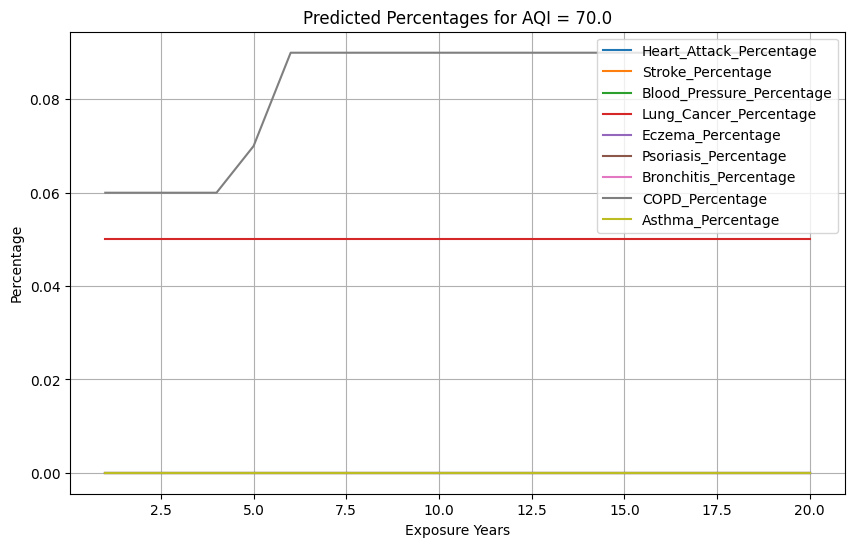

Heart_Attack_Percentage: 0.00%
Stroke_Percentage: 0.00%
Blood_Pressure_Percentage: 0.00%
Lung_Cancer_Percentage: 0.05%
Eczema_Percentage: 0.00%
Psoriasis_Percentage: 0.00%
Bronchitis_Percentage: 0.00%
COPD_Percentage: 0.06%
Asthma_Percentage: 0.00%


In [26]:

# Make predictions using the trained models
predictions = {}
for disease, model in models.items():
    prediction = model.predict(input_data[X.columns])
    predictions[disease] = prediction

# Plot the predicted percentages for each health condition
plt.figure(figsize=(10, 6))
for disease, prediction in predictions.items():
    plt.plot(range(1, 21), prediction, label=disease)

plt.title(f"Predicted Percentages for AQI = {avg_aqi}")
plt.xlabel("Exposure Years")
plt.ylabel("Percentage")
plt.legend()
plt.grid(True)
plt.show()

# Print the predicted percentages
for disease, percentage in predictions.items():
    print(f"{disease}: {percentage[0]:.2f}%")

**Result:** The program provides predictions for each health condition based on the user's input, indicating whether the individual is likely to have the respective health condition or not.